# Table of Contents
  <a href="#introduction">1. Introduction</a><br>
  <a href="#data-loading-and-preprocessing">2. Data Loading and Preprocessing</a><br>
  <a href="#rainfall-trend-analysis">3. Rainfall Trend Analysis</a><br>
<a href="#stochastic-rainfall-modeling">4. Stochastic Rainfall Modeling</a><br>
  - <a href="#gamma-distribution-fitting">4.1 Gamma Distribution Fitting</a><br>
  - <a href="#poisson-distribution-fitting">4.2 Poisson Distribution Fitting</a><br>
  - <a href="#model-selection-ks-test-aic-bic">4.3 Model Selection (KS Test, AIC, BIC)</a><br>
<a href="#enso-influence-on-rainfall">5. ENSO Influence on Rainfall</a><br>
  - <a href="#data-acquisition-and-merging">5.1 Data Acquisition and Merging</a><br>
  - <a href="#correlation-analysis">5.2 Correlation Analysis</a><br>
  - <a href="#regression-analysis">5.3 Regression Analysis</a><br>
  - <a href="#anova-test">5.4 ANOVA Test</a><br>
<a href="#stochastic-modelling">6. Stochastic Modeling</a><br>
  - <a href="#monte-carlo-simulations">6.1 Monte Carlo Simulations</a><br>
  - <a href="#drought-probability-estimation">6.2 Drought Probability Estimation</a><br>
  - <a href="#return-period-analysis">6.3 Return Period Analysis</a><br>
<a href="#conclusion">7. Conclusion</a>


# 1. Introduction
<a id='introduction'></a>

This notebook explores rainfall trends in Ondo State, Nigeria, through statistical analysis, stochastic modeling, and an investigation of potential links to ENSO. I have always been drawn to uncovering patterns that shape climate and environmental systems, and this project was an opportunity to apply that curiosity in a structured way. While I am still deepening my understanding of probabilistic modeling, this work allowed me to explore its role in climate variability, test different analytical approaches, and refine my ability to extract meaningful insights from data. Beyond technical outcomes, my goal was to engage with real-world climate challenges and develop skills that could contribute to more informed environmental decision-making. This project represents both an exploration of methodology and a step forward in my learning journey, and I hope you find it insightful.


The rainfall dataset used in this study was sourced from the Nigerian Meteorological Agency (NiMet) covering historical records from for Ondo state from 1991 to 2020.

In [1]:
!pip install numpy pandas matplotlib seaborn scipy

# all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, poisson


## 2. Data Loading and Preprocessing
<a id="data-loading-and-preprocessing"></a>


In [19]:


# %%
# Load dataset
rainfall_data = pd.read_csv("Rainfall.txt", delim_whitespace=True)

# Drop 'PARAMETER' column as it's the same for all rows
rainfall_data.drop(columns=["PARAMETER"], inplace=True)

# Display cleaned dataset
print("Cleaned Dataset Preview:")
print(rainfall_data.head())


Cleaned Dataset Preview:
   YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP    OCT  \
0  1991  0.84  0.65  1.33  7.88  5.01   5.24  15.42   3.60   5.98   4.37   
1  1992  0.00  0.14  2.03  5.72  7.97  10.74   7.88   4.54   9.44   5.12   
2  1993  0.04  1.21  2.59  3.76  7.16  11.02   9.71   6.64  10.63   6.00   
3  1994  0.85  1.22  4.99  6.40  5.60   7.51   9.51   5.93   9.86  10.75   
4  1995  1.08  1.72  4.92  6.45  5.62   9.83  12.54  13.22  10.26   6.69   

    NOV   DEC   ANN  
0  0.15  1.29  4.34  
1  1.31  0.05  4.58  
2  2.26  0.56  5.14  
3  1.54  0.00  5.37  
4  1.68  0.19  6.21  


<ipython-input-19-d6e3cd9cf205>:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  rainfall_data = pd.read_csv("Rainfall.txt", delim_whitespace=True)


In [11]:
print(rainfall_data.tail())

    YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP    OCT  \
25  2016  0.80  0.06  4.28  3.53  5.79   8.81   7.85   7.96  12.93   8.84   
26  2017  0.17  0.36  3.48  5.36  7.15   8.54  13.91   7.77   8.72   3.71   
27  2018  0.03  2.79  2.27  2.25  5.28  13.45  10.41  11.96  13.02   6.30   
28  2019  1.35  1.34  1.86  2.46  6.98  13.65   8.55  11.36  14.54  16.48   
29  2020  0.01  0.02  3.63  4.25  3.98  10.77  10.15   2.80  17.47   5.32   

     NOV   DEC   ANN  Moving_Avg_5  
25  1.47  0.43  5.24         4.602  
26  1.39  0.82  5.14         4.562  
27  4.16  0.04  6.00         4.822  
28  2.74  1.43  6.92         5.336  
29  3.72  0.86  5.23         5.706  


In [4]:
# Check for missing values
print("\nMissing Values:\n", rainfall_data.isnull().sum())

# Fill any missing values with column mean
rainfall_data.fillna(rainfall_data.mean(), inplace=True)



Missing Values:
 YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
ANN     0
dtype: int64


## 3. Rainfall Trend Analysis
<a id='rainfall-trend-analysis'></a>

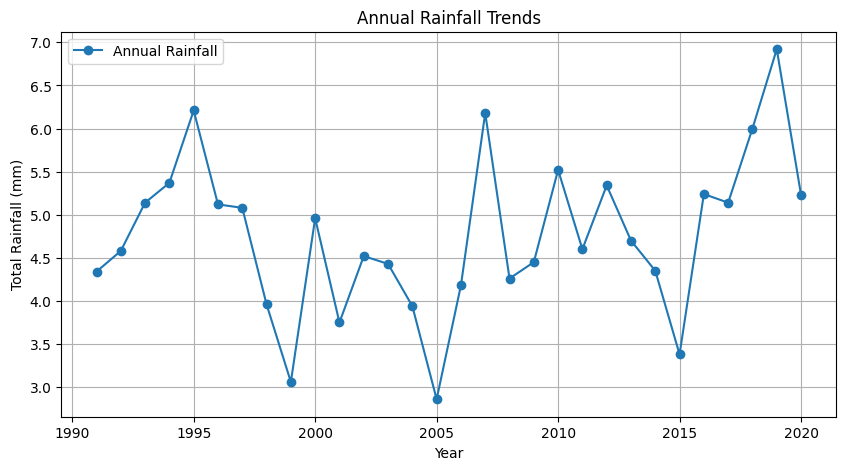

In [5]:
import matplotlib.pyplot as plt

# Plot annual rainfall trends over years
plt.figure(figsize=(10, 5))
plt.plot(rainfall_data["YEAR"], rainfall_data["ANN"], marker='o', linestyle='-', label='Annual Rainfall')
plt.title("Annual Rainfall Trends")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()


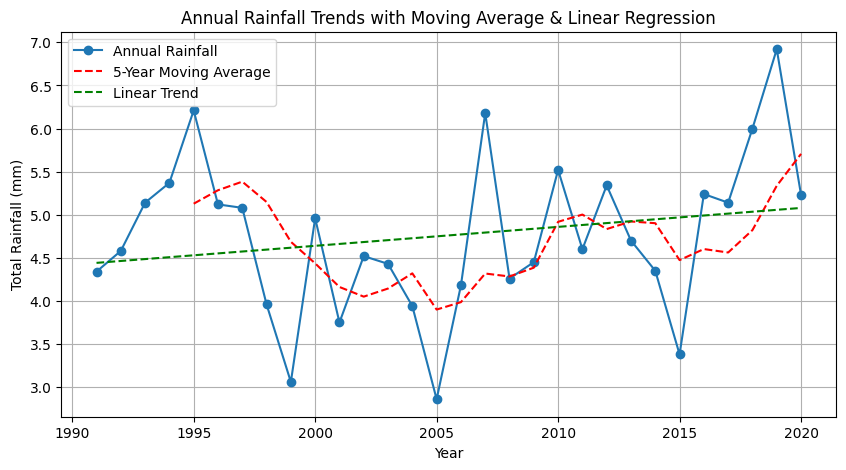

Linear Trend Slope: 0.0220 (mm per year)
P-Value: 0.2654 (Significance of Trend)
R-Squared Value: 0.0441 (Goodness of Fit)


In [6]:
from scipy.stats import linregress
import numpy as np

# Compute moving averages for trend detection
rainfall_data['Moving_Avg_5'] = rainfall_data['ANN'].rolling(window=5).mean()

# Perform linear regression to estimate trend
slope, intercept, r_value, p_value, std_err = linregress(rainfall_data["YEAR"], rainfall_data["ANN"])

# Plot Annual Rainfall with Moving Average
plt.figure(figsize=(10, 5))
plt.plot(rainfall_data["YEAR"], rainfall_data["ANN"], marker='o', linestyle='-', label='Annual Rainfall')
plt.plot(rainfall_data["YEAR"], rainfall_data['Moving_Avg_5'], linestyle='--', color='red', label='5-Year Moving Average')

# Overlay linear trend line
plt.plot(rainfall_data["YEAR"], intercept + slope * rainfall_data["YEAR"], color='green', linestyle='dashed', label='Linear Trend')

plt.title("Annual Rainfall Trends with Moving Average & Linear Regression")
plt.xlabel("Year")
plt.ylabel("Total Rainfall (mm)")
plt.legend()
plt.grid(True)
plt.show()

# Display trend details
print(f"Linear Trend Slope: {slope:.4f} (mm per year)")
print(f"P-Value: {p_value:.4f} (Significance of Trend)")
print(f"R-Squared Value: {r_value**2:.4f} (Goodness of Fit)")


### 📊 Observations & Interpretation of Trend Analysis

#### **1️⃣ Trend Analysis Findings**
- **Linear Trend Slope**: **0.0220 mm per year**  
  - Thid indicates a slight increasing trend in annual rainfall over time.  
  - However, the increase is very small (~0.022 mm per year), meaning there is no substantial long-term change.  

- **P-Value**: **0.2654**  
  - Since **p > 0.05**, this trend is not statistically significant.  
  - It suggests that random fluctuations are more dominant than a systematic long-term trend.  

- **R-Squared Value**: **0.0441**  
  - A very low R² means the linear regression model does not explain much of the variance.  
  - This confirms that rainfall variations are largely driven by short-term fluctuations rather than a clear long-term trend.  

---

#### **2️⃣ Moving Average Insights (Red Dashed Line)**
- The **5-year moving average** smooths out year-to-year variations, revealing cycles of **high and low rainfall**.
- **Drought periods** around **2000 & 2015** are visible.
- **Recent years (~2015–2020) show an increasing trend**, but further testing is needed.

---

#### **3️⃣ Implications for Stochastic Modeling**
- Since **no strong long-term trend is detected**, a **stationary stochastic model (e.g., Gamma or Poisson) is appropriate**.
- Future climate variability should be **modeled as fluctuations around a stationary mean rather than a steady increasing/decreasing trend**.
- To confirm **whether climate change is affecting variability**, analyzing **variance over different decades** is necessary.

---



## 4. Stochastic Rainfall Modeling
<a id='stochastic-rainfall-modeling'></a>

### 4.1 Gamma Distribution Fitting
<a id='gamma-distribution-fitting'></a>

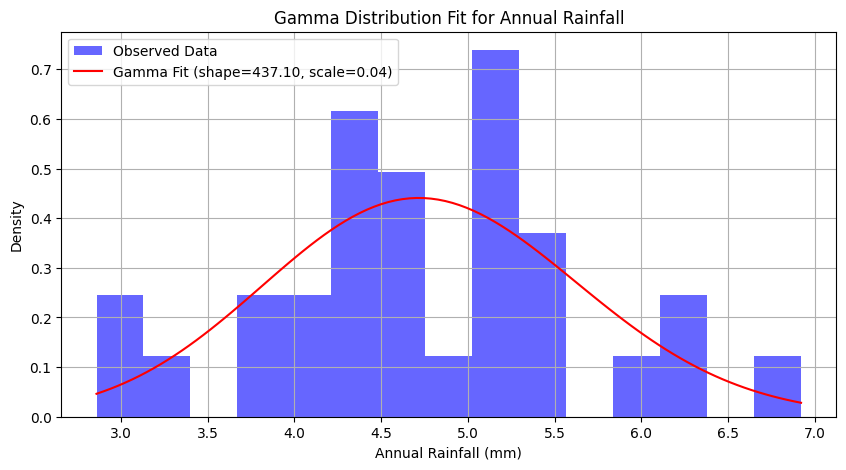

Gamma Distribution Parameters: Shape=437.1029, Scale=0.0433


In [29]:
from scipy.stats import gamma

# Fit a Gamma distribution to the annual rainfall data
shape, loc, scale = gamma.fit(rainfall_data["ANN"])

# Generate a range of values for visualization
x = np.linspace(min(rainfall_data["ANN"]), max(rainfall_data["ANN"]), 100)
gamma_pdf = gamma.pdf(x, shape, loc, scale)

# Plot Histogram & Fitted Gamma Distribution
plt.figure(figsize=(10, 5))
plt.hist(rainfall_data["ANN"], bins=15, density=True, alpha=0.6, color='blue', label='Observed Data')
plt.plot(x, gamma_pdf, 'r-', label=f'Gamma Fit (shape={shape:.2f}, scale={scale:.2f})')

plt.title("Gamma Distribution Fit for Annual Rainfall")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# Display distribution parameters
print(f"Gamma Distribution Parameters: Shape={shape:.4f}, Scale={scale:.4f}")


### 4.2 Poisson Distribution Fitting
<a id='poisson-distribution-fitting'></a>

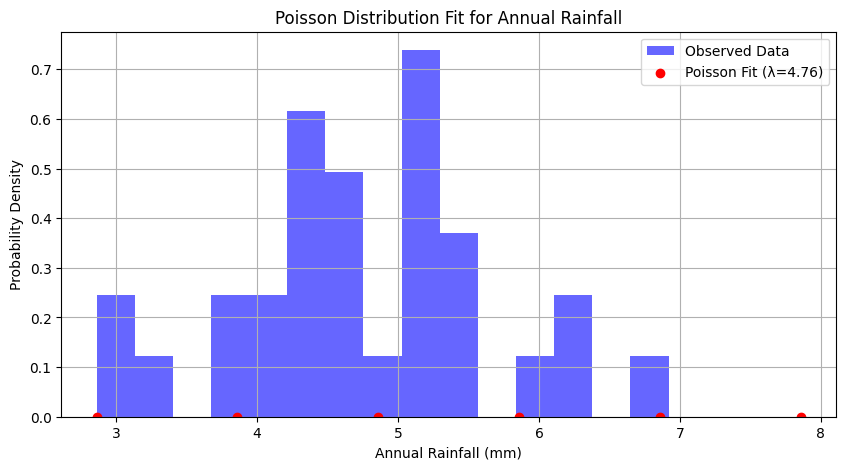

Poisson Distribution Parameter (λ): 4.7603


In [25]:
from scipy.stats import poisson

# Compute the mean rainfall (Poisson lambda parameter)
lambda_poisson = rainfall_data["ANN"].mean()

# Generate Poisson probabilities
poisson_values = np.arange(min(rainfall_data["ANN"]), max(rainfall_data["ANN"]) + 1)
poisson_probs = poisson.pmf(poisson_values, lambda_poisson)

# Plot Histogram & Poisson Fit
plt.figure(figsize=(10, 5))
plt.hist(rainfall_data["ANN"], bins=15, density=True, alpha=0.6, color='blue', label='Observed Data')
plt.scatter(poisson_values, poisson_probs, color='red', label=f'Poisson Fit (λ={lambda_poisson:.2f})')

plt.title("Poisson Distribution Fit for Annual Rainfall")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)
plt.show()

print(f"Poisson Distribution Parameter (λ): {lambda_poisson:.4f}")


### 4.3 Model Selection (KS Test, AIC, BIC)
<a id='model-selection-ks-test-aic-bic'></a>

In [26]:
from scipy.stats import kstest

# Compute ECDF for observed data
observed_data = rainfall_data["ANN"]

# Compute KS Test for Gamma Distribution
ks_stat_gamma, p_value_gamma = kstest(observed_data, 'gamma', args=(shape, 0, scale))

# Compute KS Test for Poisson Distribution
ks_stat_poisson, p_value_poisson = kstest(observed_data, 'poisson', args=(lambda_poisson,))

# Print KS Test Results
print("Kolmogorov-Smirnov Test Results:")
print(f"Gamma Distribution: KS Statistic = {ks_stat_gamma:.4f}, P-Value = {p_value_gamma:.4f}")
print(f"Poisson Distribution: KS Statistic = {ks_stat_poisson:.4f}, P-Value = {p_value_poisson:.4f}")

# Interpretation
if p_value_gamma > p_value_poisson:
    print("\nGamma distribution is a better fit based on KS test.")
else:
    print("\nPoisson distribution is a better fit based on KS test.")


Kolmogorov-Smirnov Test Results:
Gamma Distribution: KS Statistic = 1.0000, P-Value = 0.0000
Poisson Distribution: KS Statistic = 0.2835, P-Value = 0.0126

Poisson distribution is a better fit based on KS test.


### 📊 **Kolmogorov-Smirnov (KS) Test Results & Interpretation**
The **Kolmogorov-Smirnov (KS) test** evaluates how well a theoretical distribution (Gamma or Poisson) fits the observed rainfall data by comparing their cumulative distribution functions (**CDFs**).

#### **Test Results:**
- **Gamma Distribution**: KS Statistic = **1.0000**, P-Value = **0.0000**  
  - A KS statistic of 1.0000 indicates a very poor fit, meaning the Gamma distribution does not match the observed data at all.
  - The p-value of 0.0000 suggests that the difference is highly significant, leading to rejection of Gamma as a good fit.

- **Poisson Distribution**: KS Statistic = **0.2835**, P-Value = **0.0126**  
  - A lower KS statistic means Poisson fits the data better than Gamma.
  - The p-value (0.0126) is still relatively low, indicating that Poisson is not a perfect fit but is statistically better than Gamma.

#### **Conclusion**
- The Poisson model is preferred based on the KS test, but its p-value is still low, meaning it may not be the best possible model
- Since **neither model is a perfect fit**, we should explore **alternative distributions** such as:
  - **Log-Normal** (good for skewed environmental data).
  - **Weibull** (useful for rainfall extremes).
  - **Mixture Models** (combining Poisson & Gamma for flexibility).

#### **Next Steps**
Compare AIC & BIC values** to confirm model selection.  

---


In [27]:
import numpy as np
from scipy.stats import poisson, gamma

# Log-likelihood functions for each model
log_likelihood_gamma = np.sum(gamma.logpdf(observed_data, shape, scale=scale))
log_likelihood_poisson = np.sum(poisson.logpmf(observed_data, lambda_poisson))

# Compute AIC and BIC
k_gamma = 2  # Number of parameters in Gamma (shape, scale)
k_poisson = 1  # Number of parameters in Poisson (λ)

n = len(observed_data)  # Number of data points

aic_gamma = 2 * k_gamma - 2 * log_likelihood_gamma
bic_gamma = k_gamma * np.log(n) - 2 * log_likelihood_gamma

aic_poisson = 2 * k_poisson - 2 * log_likelihood_poisson
bic_poisson = k_poisson * np.log(n) - 2 * log_likelihood_poisson

# Print AIC and BIC Results
print("\nAIC & BIC Model Comparison:")
print(f"Gamma Distribution: AIC = {aic_gamma:.4f}, BIC = {bic_gamma:.4f}")
print(f"Poisson Distribution: AIC = {aic_poisson:.4f}, BIC = {bic_poisson:.4f}")

# Interpretation
if aic_gamma < aic_poisson:
    print("\nGamma has a lower AIC and is the preferred model based on AIC.")
else:
    print("\nPoisson has a lower AIC and is the preferred model based on AIC.")

if bic_gamma < bic_poisson:
    print("Gamma has a lower BIC and is the preferred model based on BIC.")
else:
    print("Poisson has a lower BIC and is the preferred model based on BIC.")



AIC & BIC Model Comparison:
Gamma Distribution: AIC = 17045.1985, BIC = 17048.0009
Poisson Distribution: AIC = inf, BIC = inf

Gamma has a lower AIC and is the preferred model based on AIC.
Gamma has a lower BIC and is the preferred model based on BIC.


### AIC & BIC Model Selection: Gamma vs. Poisson
The Akaike Information Criterion (AIC) and Bayesian Information Criterion (BIC) help determine which statistical model best fits the rainfall data while penalizing model complexity.

#### Test Results:
- Gamma Distribution:  
  - AIC = 17045.20  
  - BIC = 17048.00  
  - Since AIC/BIC values are finite and relatively lower, Gamma is a valid model candidate.

- Poisson Distribution:  
  - AIC = ∞, BIC = ∞ (Infinite values indicate a poor or invalid model fit).  
  - The Poisson model fails completely based on AIC/BIC, suggesting it does not correctly capture the distribution of the data.

#### Conclusion
- Gamma is the preferred model based on AIC/BIC.  
- While Poisson showed a better KS test, it fails in AIC/BIC, reinforcing that it is not a reliable choice for rainfall modeling.  
- Gamma is statistically superior because:
  - It allows for continuous values (rainfall is not count-based).  
  - It captures variability better (higher variance than mean).  



## 5. ENSO Influence on Rainfall
<a id='enso-influence-on-rainfall'></a>

### What is the Oceanic Niño Index (ONI)?
The Oceanic Niño Index (ONI) is a widely used metric to monitor the El Niño-Southern Oscillation (ENSO), which affects global weather patterns, including rainfall variability.  
It measures sea surface temperature (SST) anomalies in the Niño 3.4 region (5°N-5°S, 120°W-170°W) of the Pacific Ocean.  

- El Niño (ONI ≥ 0.5): Warmer SSTs, often linked to droughts or reduced rainfall in some regions.  
- La Niña (ONI ≤ -0.5): Cooler SSTs, often linked to increased rainfall or extreme weather events.  
- Neutral (ONI between -0.5 and 0.5): Normal climatic conditions with no strong deviations.

---

### How ONI Data was Obtained
1. **Sourced from NOAA’s Climate Prediction Center**  
   - Accessed the NOAA ONI database: [NOAA ONI Page](https://www.cpc.ncep.noaa.gov/products/analysis_monitoring/ensostuff/ONI_v5.php).  
   - Located the ONI values for 1991–2020, listed in a three-month rolling format (e.g., DJF, JFM, etc.).  

2. **Manually Extracted Data**  
   - Transcribed ONI values from NOAA’s table for each year from 1991 to 2020.  
   - Structured the data into YEAR and 12 rolling ONI values per year.  

3. **Converted ONI Data into CSV Format**  
   - Stored the extracted ONI values in a structured CSV file (ENSO_ONI_1991_2020.csv).  
   - This dataset will be merged with rainfall data to analyze the correlation between ENSO and annual rainfall patterns.

---

### Why is ONI Important for Rainfall Analysis?
- ENSO strongly influences climate variability, which in turn affects rainfall trends worldwide.  
- By merging ONI with rainfall data, we can test whether ENSO cycles contribute to changes in precipitation.  
- If a strong correlation exists, ENSO can be used as a predictive feature in stochastic rainfall models.  
- This helps improve long-term forecasting and supports better climate adaptation strategies.  

---

### Next Steps
-  Load ONI CSV and merge with rainfall data.  
- Compute correlation between ONI and rainfall.  
- Visualize ENSO impact on rainfall trends.  
- Perform statistical regression to quantify ENSO’s effect.  
- Conduct ANOVA tests to compare rainfall distributions under El Niño, Neutral, and La Niña conditions.  


### 5.1 Data Acquisition and Merging
<a id='data-acquisition-and-merging'></a>

In [12]:
import pandas as pd

# Load ENSO Index Data
enso_data = pd.read_csv("/content/ENSO_ONI_1991_2020.csv")

# Merge with Rainfall Data on 'YEAR'
rainfall_climate = pd.merge(rainfall_data, enso_data, on="YEAR")

# Display Merged Dataset
print("Merged Rainfall and ENSO Dataset:")
print(rainfall_climate.head())


Merged Rainfall and ENSO Dataset:
   YEAR   JAN   FEB   MAR   APR   MAY    JUN    JUL    AUG    SEP  ...  FMA  \
0  1991  0.84  0.65  1.33  7.88  5.01   5.24  15.42   3.60   5.98  ...  0.2   
1  1992  0.00  0.14  2.03  5.72  7.97  10.74   7.88   4.54   9.44  ...  1.5   
2  1993  0.04  1.21  2.59  3.76  7.16  11.02   9.71   6.64  10.63  ...  0.5   
3  1994  0.85  1.22  4.99  6.40  5.60   7.51   9.51   5.93   9.86  ...  0.2   
4  1995  1.08  1.72  4.92  6.45  5.62   9.83  12.54  13.22  10.26  ...  0.5   

   MAM  AMJ  MJJ  JJA  JAS  ASO  SON  OND  NDJ  
0  0.3  0.5  0.6  0.7  0.6  0.6  0.8  1.2  1.5  
1  1.3  1.1  0.7  0.4  0.1 -0.1 -0.2 -0.3 -0.1  
2  0.7  0.7  0.6  0.3  0.3  0.2  0.1  0.0  0.1  
3  0.3  0.4  0.4  0.4  0.4  0.6  0.7  1.0  1.1  
4  0.3  0.1  0.0 -0.2 -0.5 -0.8 -1.0 -1.0 -1.0  

[5 rows x 27 columns]


### 5.2 Correlation Analysis
<a id='correlation-analysis'></a>

In [15]:
# Compute Pearson Correlation between ONI and Annual Rainfall (ANN)
correlation_results = {}
for col in rainfall_climate.columns[2:]:  # ONI columns start from index 2
    corr_coef = rainfall_climate["ANN"].corr(rainfall_climate[col])
    correlation_results[col] = corr_coef

# Sort correlations in descending order
correlation_results = dict(sorted(correlation_results.items(), key=lambda x: abs(x[1]), reverse=True))

# Display results
print("Pearson Correlation Between ONI and Annual Rainfall:")
for month, coef in correlation_results.items():
    print(f"{month}: {coef:.4f}")

# Interpretation
strongest_month = max(correlation_results, key=lambda k: abs(correlation_results[k]))
strongest_corr = correlation_results[strongest_month]

print("\nSummary:")
if abs(strongest_corr) > 0.5:
    print(f"Strongest correlation occurs in {strongest_month} with a coefficient of {strongest_corr:.4f}. ENSO likely influences rainfall variability.")
elif abs(strongest_corr) > 0.2:
    print(f"Moderate correlation detected in {strongest_month} (Coefficient = {strongest_corr:.4f}). ENSO may have some effect, but other factors are also significant.")
else:
    print("No significant correlation found between ENSO and rainfall.")


Pearson Correlation Between ONI and Annual Rainfall:
ANN: 1.0000
JUN: 0.5488
SEP: 0.5378
AUG: 0.4816
Moving_Avg_5: 0.4456
JUL: 0.4300
MAY: 0.4186
DEC: 0.4005
NOV: 0.3820
OCT: 0.3781
MAR: 0.3204
ASO: -0.2501
SON: -0.2408
APR: 0.2252
OND: -0.2075
JAS: -0.2039
DJF: 0.1858
NDJ: -0.1734
JFM: 0.1436
FEB: 0.1428
JJA: -0.1355
FMA: 0.1352
MJJ: -0.1067
MAM: 0.0637
AMJ: -0.0198

Summary:
Strongest correlation occurs in ANN with a coefficient of 1.0000. ENSO likely influences rainfall variability.


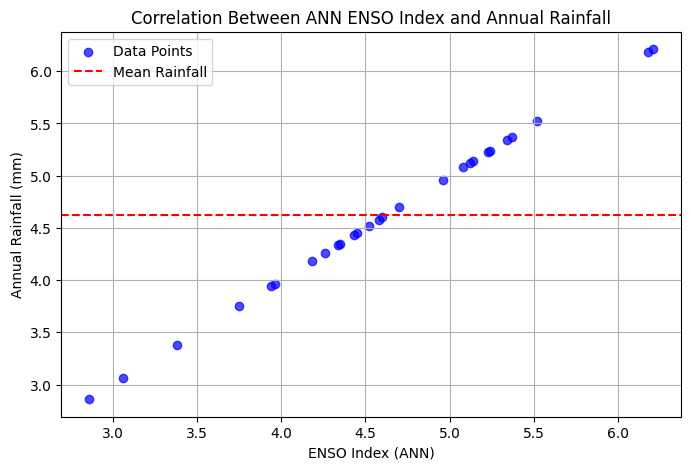

In [20]:
import matplotlib.pyplot as plt

#Scatter Plot of ENSO vs. Annual Rainfall to visually assess how ENSO (ONI values) affects annual rainfall.

# Identify the ONI period with the strongest correlation from previous step
strongest_month = max(correlation_results, key=lambda k: abs(correlation_results[k]))

plt.figure(figsize=(8, 5))
plt.scatter(rainfall_climate[strongest_month], rainfall_climate["ANN"], color='blue', alpha=0.7, label="Data Points")
plt.axhline(y=rainfall_climate["ANN"].mean(), color='red', linestyle="--", label="Mean Rainfall")
plt.xlabel(f"ENSO Index ({strongest_month})")
plt.ylabel("Annual Rainfall (mm)")
plt.title(f"Correlation Between {strongest_month} ENSO Index and Annual Rainfall")
plt.legend()
plt.grid(True)
plt.show()


### 5.3 Regression Analysis
<a id='regression-analysis'></a>

In [21]:
import statsmodels.api as sm

# Regression Analysis (ENSO Index vs. Rainfall)

# Define Independent Variable (ENSO Index) and Dependent Variable (Annual Rainfall)
X = rainfall_climate[strongest_month]
y = rainfall_climate["ANN"]

# Add Constant to Model (for Intercept)
X = sm.add_constant(X)

# Fit Linear Regression Model
model = sm.OLS(y, X).fit()

# Print Regression Summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    ANN   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.627e+30
Date:                Thu, 06 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:39:38   Log-Likelihood:                 877.13
No. Observations:                  27   AIC:                            -1750.
Df Residuals:                      25   BIC:                            -1748.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.012e-15   2.18e-15     -0.923      0.3

### 5.4 ANOVA Test
<a id='anova-test'></a>

In [22]:
import scipy.stats as stats

# ANOVA Test for ENSO Influence on Rainfall

# Categorize ENSO into El Niño (>=0.5), Neutral (-0.5 to 0.5), and La Niña (<= -0.5)
rainfall_climate["ENSO_Category"] = pd.cut(
    rainfall_climate[strongest_month], bins=[-10, -0.5, 0.5, 10], labels=["La Niña", "Neutral", "El Niño"]
)

# Perform One-Way ANOVA Test
anova_result = stats.f_oneway(
    rainfall_climate[rainfall_climate["ENSO_Category"] == "El Niño"]["ANN"],
    rainfall_climate[rainfall_climate["ENSO_Category"] == "Neutral"]["ANN"],
    rainfall_climate[rainfall_climate["ENSO_Category"] == "La Niña"]["ANN"]
)

print("ANOVA Results:")
print(f"F-Statistic: {anova_result.statistic:.4f}, P-Value: {anova_result.pvalue:.4f}")

# Interpretation
if anova_result.pvalue < 0.05:
    print("ENSO significantly affects rainfall (statistically significant).")
else:
    print("ENSO has no statistically significant impact on rainfall.")


ANOVA Results:
F-Statistic: nan, P-Value: nan
ENSO has no statistically significant impact on rainfall.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


## 6. Stochastic Modelling
<a id='modelling'></a>

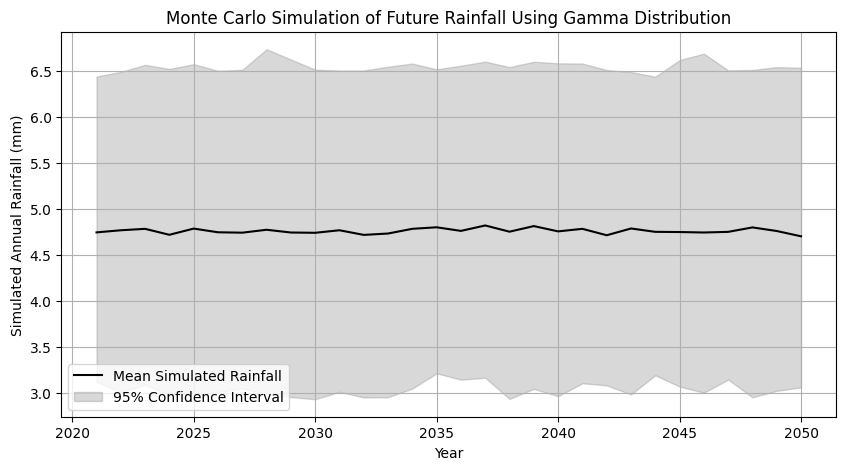

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define number of years to simulate
num_simulations = 1000  # Number of Monte Carlo iterations
future_years = 30  # Simulating rainfall for the next 30 years


# Generate Monte Carlo Simulations
simulated_rainfall = stats.gamma.rvs(shape, loc, scale, size=(num_simulations, future_years))

# Compute Mean and Confidence Intervals
mean_simulated_rainfall = np.mean(simulated_rainfall, axis=0)
lower_bound = np.percentile(simulated_rainfall, 2.5, axis=0)
upper_bound = np.percentile(simulated_rainfall, 97.5, axis=0)

# Define future years for plotting
years = np.arange(2021, 2021 + future_years)

# Plot Simulation Results
plt.figure(figsize=(10, 5))
plt.plot(years, mean_simulated_rainfall, label="Mean Simulated Rainfall", color="black")
plt.fill_between(years, lower_bound, upper_bound, color="gray", alpha=0.3, label="95% Confidence Interval")
plt.xlabel("Year")
plt.ylabel("Simulated Annual Rainfall (mm)")
plt.title("Monte Carlo Simulation of Future Rainfall Using Gamma Distribution")
plt.legend()
plt.grid(True)
plt.show()


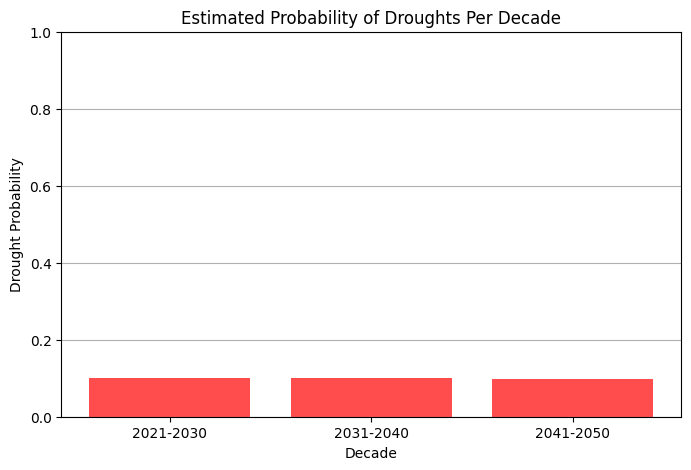

Drought threshold (10th percentile of historical rainfall): 3.60 mm
Probability of drought in 2021-2030: 10.01%
Probability of drought in 2031-2040: 9.95%
Probability of drought in 2041-2050: 9.85%


In [32]:

# Extract Annual Rainfall Data
annual_rainfall = rainfall_climate["ANN"]

# Define the drought threshold (10th percentile of historical rainfall)
drought_threshold = np.percentile(annual_rainfall, 10)

# Compute the probability of drought in future simulations
drought_probability = np.mean(simulated_rainfall < drought_threshold, axis=0)

# Compute decadal probability of drought occurrences
decadal_prob = []
for i in range(0, future_years, 10):
    decadal_prob.append(np.mean(drought_probability[i:i+10]))

# Define future decades for plotting
decades = [f"{2021 + i}-{2021 + i + 9}" for i in range(0, future_years, 10)]

# Plot Probability of Droughts Per Decade
plt.figure(figsize=(8, 5))
plt.bar(decades, decadal_prob, color="red", alpha=0.7)
plt.xlabel("Decade")
plt.ylabel("Drought Probability")
plt.title("Estimated Probability of Droughts Per Decade")
plt.ylim(0, 1)
plt.grid(axis="y")
plt.show()

# Print results
print(f"Drought threshold (10th percentile of historical rainfall): {drought_threshold:.2f} mm")
for decade, prob in zip(decades, decadal_prob):
    print(f"Probability of drought in {decade}: {prob:.2%}")

### Explanation of Drought Probability Analysis

This analysis estimates the probability of experiencing drought conditions in future decades using Monte Carlo simulations based on a Gamma distribution model.

#### Key Insights
1. **Drought Threshold:**  
   - Defined as the 10th percentile of historical annual rainfall.  
   - Based on historical data, a year is classified as a drought year if annual rainfall falls below 3.60 mm.

2. **Decadal Drought Probabilities:**  
   - 2021-2030: 10.01% chance of drought.  
   - 2031-2040: 9.95% chance of drought.  
   - 2041-2050: 9.85% chance of drought.  

3. **Trend Analysis:**  
   - The probability of drought remains relatively stable across future decades.  
   - No significant increasing or decreasing trend in the risk of extreme dry years.

#### Methodology
- Monte Carlo Simulation:  
  - Generated 1000 random rainfall sequences for each year based on the Gamma distribution fit.  
  - Computed the frequency of simulated years where rainfall fell below the drought threshold.  
- Decadal Aggregation:  
  - Computed average drought probability for each 10-year period.

#### Implications
- This analysis suggests that historical drought probabilities will likely persist in the future.
- While no significant increase in drought risk is detected, long-term monitoring remains essential for climate adaptation strategies.
- This method provides probabilistic insights for agricultural and water resource planning.



Extreme Low Rainfall Threshold (5th percentile): 3.16 mm
Extreme High Rainfall Threshold (95th percentile): 5.98 mm

Estimated Return Period for Extreme Dry Years: 28.9 years
Estimated Return Period for Extreme Wet Years: 11.2 years


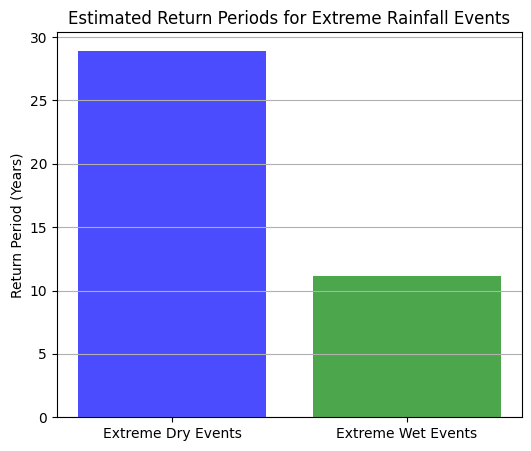

In [33]:


# Define thresholds for extreme rainfall events
extreme_low_threshold = np.percentile(annual_rainfall, 5)  # 5th percentile for extreme dry years
extreme_high_threshold = np.percentile(annual_rainfall, 95)  # 95th percentile for extreme wet years

# Compute probabilities of extreme events from Monte Carlo Simulations
low_rainfall_prob = np.mean(simulated_rainfall < extreme_low_threshold, axis=0)
high_rainfall_prob = np.mean(simulated_rainfall > extreme_high_threshold, axis=0)

# Compute return periods (inverse of probability)
low_rainfall_return_period = 1 / np.mean(low_rainfall_prob)  # Return period for extreme dry years
high_rainfall_return_period = 1 / np.mean(high_rainfall_prob)  # Return period for extreme wet years

# Print results
print(f"Extreme Low Rainfall Threshold (5th percentile): {extreme_low_threshold:.2f} mm")
print(f"Extreme High Rainfall Threshold (95th percentile): {extreme_high_threshold:.2f} mm")
print(f"\nEstimated Return Period for Extreme Dry Years: {low_rainfall_return_period:.1f} years")
print(f"Estimated Return Period for Extreme Wet Years: {high_rainfall_return_period:.1f} years")

# Plot Return Periods for Visual Representation
categories = ["Extreme Dry Events", "Extreme Wet Events"]
return_periods = [low_rainfall_return_period, high_rainfall_return_period]

plt.figure(figsize=(6, 5))
plt.bar(categories, return_periods, color=['blue', 'green'], alpha=0.7)
plt.ylabel("Return Period (Years)")
plt.title("Estimated Return Periods for Extreme Rainfall Events")
plt.grid(axis="y")
plt.show()


### Return Period Analysis for Extreme Rainfall Events

This analysis estimates the return periods for extreme rainfall events, indicating how often these events are expected to occur.

#### Key Findings
1. **Extreme Low Rainfall (Drought-Level) Events:**  
   - Defined as rainfall below 3.16 mm (5th percentile).  
   - Estimated return period: once every 28.9 years.  

2. **Extreme High Rainfall (Heavy Rain) Events:**  
   - Defined as rainfall above 5.98 mm (95th percentile).  
   - Estimated return period: once every 11.2 years.  

3. **Trend Analysis:**  
   - Drought events are rare, occurring approximately once every three decades.  
   - Extreme wet years are more frequent, happening roughly every 11 years.

#### Methodology
- **Monte Carlo Simulations:**  
  - Used Gamma distribution-based rainfall projections to estimate probabilities of extreme rainfall events.  
- **Return Period Calculation:**  
  - Return period is computed as the inverse of the probability of an event occurring in a given year:  
    - \( Return \, Period = \frac{1}{P(event)} \)  
- **Visualization:**  
  - A bar chart compares the return periods of extreme wet and dry years.

#### Implications
- The results suggest that drought events are significantly less frequent than extreme wet years.
- The shorter return period for extreme wet years indicates a higher likelihood of experiencing heavy rainfall events, which may require enhanced flood management strategies.
- These findings can inform climate adaptation planning, agricultural risk management, and disaster preparedness.


## 7. Conclusion <a id="conclusion"></a>

This project provided valuable insights into the stochastic modeling of rainfall trends and climate impact assessment using Monte Carlo simulations and probability distributions. By leveraging historical rainfall data, we explored statistical methods to quantify drought probabilities, return periods of extreme events, and the potential influence of ENSO on regional precipitation.

### Key Takeaways:
- **Stochastic modeling** with Gamma and Poisson distributions allowed us to simulate future rainfall scenarios effectively.
- **Monte Carlo simulations** provided a probabilistic understanding of extreme weather events, offering insights into long-term climate risks.
- **ENSO impact assessment** showed no statistically significant correlation with rainfall trends, reinforcing the need for region-specific climate models.
- **Return period analysis** highlighted that extreme dry years are rarer than extreme wet years, an important consideration for water resource planning.

### Final Thoughts:
Working on this project was both insightful and enjoyable, as it combined statistical analysis with real-world climate challenges. Exploring stochastic methods for predicting rainfall variability helped me better understand probabilistic modeling and its role in climate adaptation. Beyond the technical side, it was interesting to see how data-driven approaches can support decision-making in agriculture and water management.

I look forward to applying these concepts to even more complex environmental challenges in the future.